У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data_path = '../M4/yulu_rental.csv'
df = pd.read_csv(data_path)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


*Питання №1*. Яка загальна річна динаміка зміни к-сті користувачів по типам (зареєстровані та неформальні)? Чи є закономірності зміни к-сті користувачів по місяцям на основі 2-х річної динаміки?

In [4]:
df['datetime'] = pd.to_datetime(df.datetime)
df['date'] = df.datetime.dt.date
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,1


In [5]:
df_by_years = df.groupby(['year'])['registered','casual'].sum()
df_by_years

C:\Users\OVORON~1\AppData\Local\Temp/ipykernel_12512/1243171274.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_years = df.groupby(['year'])['registered','casual'].sum()


,registered,casual
year,,
2011,626162,155817
2012,1067179,236318


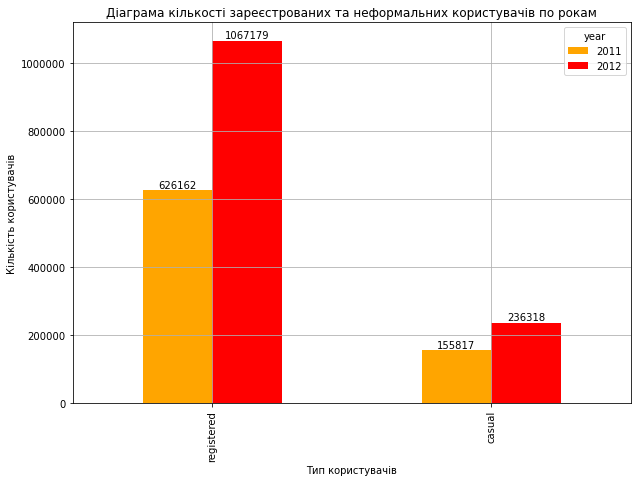

In [6]:
colors = ['orange','red']
ax = df_by_years.T.plot.bar(figsize=(10,7),color=colors)

for container in ax.containers:
    ax.bar_label(container, fmt='%.d')
    
plt.title('Діаграма кількості зареєстрованих та неформальних користувачів по рокам')
plt.xlabel('Тип користувачів')
plt.ylabel('Кількість користувачів')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True);

Висновки:
1. Кількість зареєстрованих користувачів у 2012 році досягла 1 067 179 осіб, показавши значний приріст порівняно з 2011 роком - 70,4%
2. Кількість неформальних користувачів у 2012 році становить 236 318 осіб, що у 4,5 рази менше бази зареєстрованих користувачів. Також важливо відмітити, що приріст неформальних користувачів у 2012 році склав 51,7%, продемонструвавши дещо нижчий рівень порівняно з приростом зареєстрованих користувачів (на -18,7 п.п.)

In [7]:
df_by_month = df.groupby(['year', 'month'], as_index=False)['registered','casual'].sum()
df_by_2011 = df_by_month[df_by_month.year==2011]
df_by_2012 = df_by_month[df_by_month.year==2012]

C:\Users\OVORON~1\AppData\Local\Temp/ipykernel_12512/4038271230.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month = df.groupby(['year', 'month'], as_index=False)['registered','casual'].sum()


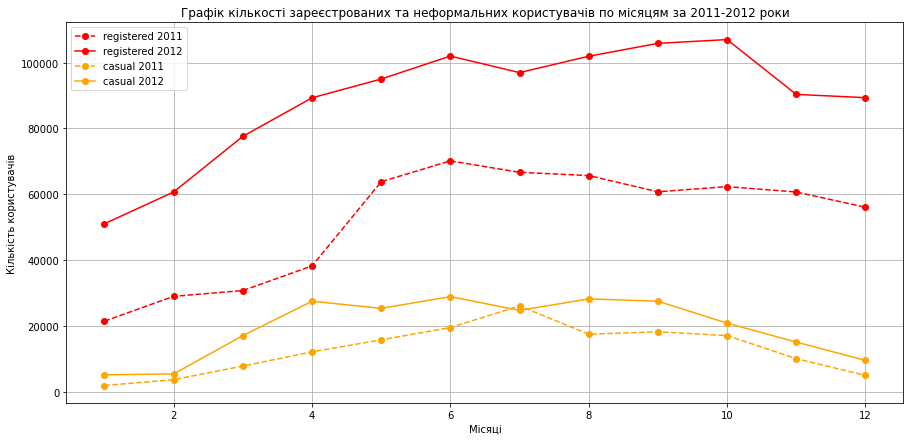

In [8]:
fig = plt.figure(figsize=(15, 7))
plt.plot('month', 'registered', data=df_by_2011, color='red', linestyle='--', label='registered 2011', marker='o', markerfacecolor='r')
plt.plot('month', 'registered', data=df_by_2012, color='red', label='registered 2012', marker='o', markerfacecolor='r')
plt.plot('month', 'casual', data=df_by_2011, color='orange', linestyle='--', label='casual 2011', marker='o', markerfacecolor='orange')
plt.plot('month', 'casual', data=df_by_2012, color='orange', label='casual 2012', marker='o', markerfacecolor='orange')

plt.title('Графік кількості зареєстрованих та неформальних користувачів по місяцям за 2011-2012 роки')
plt.xlabel('Місяці')
plt.ylabel('Кількість користувачів')
plt.legend()
plt.grid(True)
plt.show;

Висновки:
1. З помісячної статистики к-сті зареєстрованих користувачів за 2011-2012 роки видно, що найменший попит на послугу в даному сегменті спостергігається у січні (точка найнижчих показників). З лютого попит на електровелосипеди зростає, досягаючи найвищих показників влітку та вересні-жовтні. З листопаду попит знову падає. Дані двох років мають подібну сезонну закономірність, що дозволяє використувати даний тренд для прогнозування доходів та стимулювання менш активних місяців для росту продажів.
2. Важливо відмітити, що у липні 2012 було незначне просідання к-сті зареєстрованих користувачів. Варто дослідити причини, щоб по можливості нівелювати даний тренд у майбутніх роках.
3. К-сть неформальних користувачів має подібний до зареєстрованих тренд попиту. Найбільші показники досягаються у квітні-вересні. При цьому у липні 2012 також спостерігалося просідання до минулорічного рівня.

*Питання №2*. Чи відрізняється попит на електровелосипеди у зареєстрованих та неформальних користувачів в залежності від дня тижня (робочий/ вихідний)?

In [9]:
df_by_workdays = df.groupby(['workingday'])['registered', 'casual'].sum()
df_by_workdays

C:\Users\OVORON~1\AppData\Local\Temp/ipykernel_12512/2903164385.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_workdays = df.groupby(['workingday'])['registered', 'casual'].sum()


,registered,casual
workingday,,
0,448835,206037
1,1244506,186098


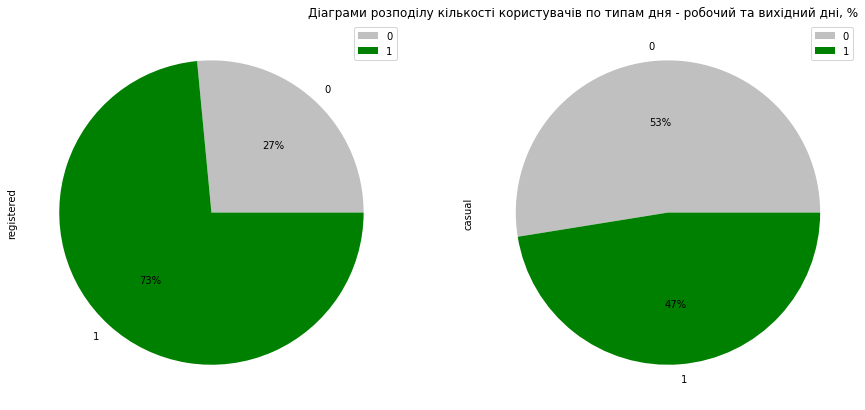

In [10]:
colors = ['silver', 'green']  
df_by_workdays.plot.pie(subplots=True, figsize=(15, 7), autopct='%1.0f%%', colors=colors)
plt.title('Діаграми розподілу кількості користувачів по типам дня - робочий та вихідний дні, %', loc='right');

Висновки:
1. З діаграми вище видно, що 73% всіх зареєстрованих користувачів скористалися електровелосипедом у робочий день, тобто це ключовий період використання даного транспорту для сегменту. Отже, електровелосипед даний сегмент розглядає як транспорт на/ з роботи.
2. Для неформальних користувачів день тижня не впливає на вибір транспорту - поділ на будні/ вихідні становить відповідно 47% і 53%. Отже, неформальні користувачі звертаються до електровелосипедів ситуативно і з дещо більшою долею у вихідні.

*Питання №3*. Чи впливає швидкість вітру на попит послугою? Чи існує залежність між даними погодними умовами та к-стю користувачів?

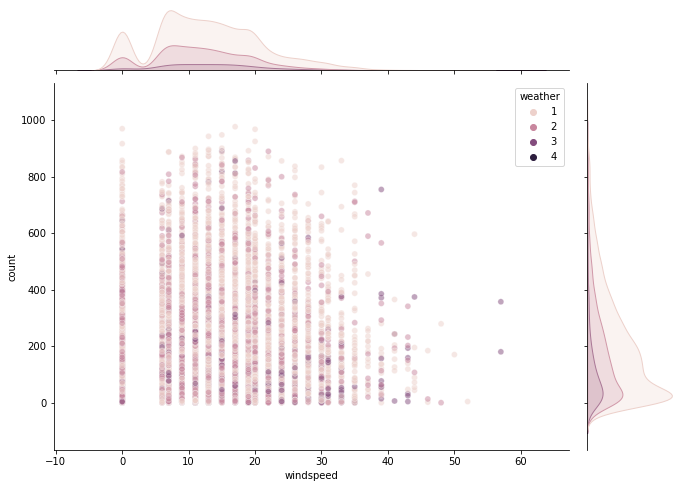

In [11]:
g = sns.jointplot(data=df, x='windspeed', y='count', hue='weather', alpha=0.5)
g.figure.set_size_inches(10, 7);

Висновки:
1. З графіку розсіювання вище видно, що прямої кореляції між швидкістю вітру та к-стю користувачів немає (аналогічно до вологості повітря).
2. Однак графік підтверджує, що хороший попит на послугу досягається за хороших погодних умов з відповідними показниками швидкості вітру - від 0 до 20. З рівня швидкості вітру від 20 к-сть користувачів поступово зменшується і втрачається орієнтовно на рівні 40-50. Тобто з показника вітру 40-50 користувачі вже не обирають такий вид відкритого транспорту.